In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb, rgb2gray, rgb2lab, lab2rgb
from skimage.util import random_noise
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
from scipy.signal import correlate2d

In [ ]:
#Bastián Andrés Carrasco Espinoza A01761668
#Samantha Daniela Guanipa Ugas A01703936
#Cesar Alonso Álvarez Rojas A01761589
#Carlos Nicolás Ávila Amigo A01761673
#Edgar Alexander Carrizalez Lerín A01024901

#La funcion de la actividad se encuentra hasta abajo. 

In [2]:
plots = lambda rows=1, cols=1, figsize=(20,10): plt.subplots(rows, cols, figsize=(figsize))
GREY = plt.cm.gray
REDS = plt.cm.Reds
GREENS = plt.cm.Greens
BLUES = plt.cm.Blues

In [3]:
moon = imread('images_class/480px-Full_moon.jpeg')
moon_gray = rgb2gray(moon)

In [4]:
def imshow_gray(img, size=(10,10)):
        f, ax = plots(figsize=size)
        ax.imshow(img, cmap=GREY), ax.axis('off')
        plt.show()
def plot_hist(img, bins=20):
        f, (ax1, ax2) = plots(1, 2)
        ax1.imshow(img, cmap=GREY), ax1.axis('off')
        ax2.hist(np.ravel(img), bins=bins, color='gray')
        plt.show()
def plot_line(img, position, size = (20,10)):
    f, a = plots(figsize=size)
    a.plot(img[position, :])
    plt.show()

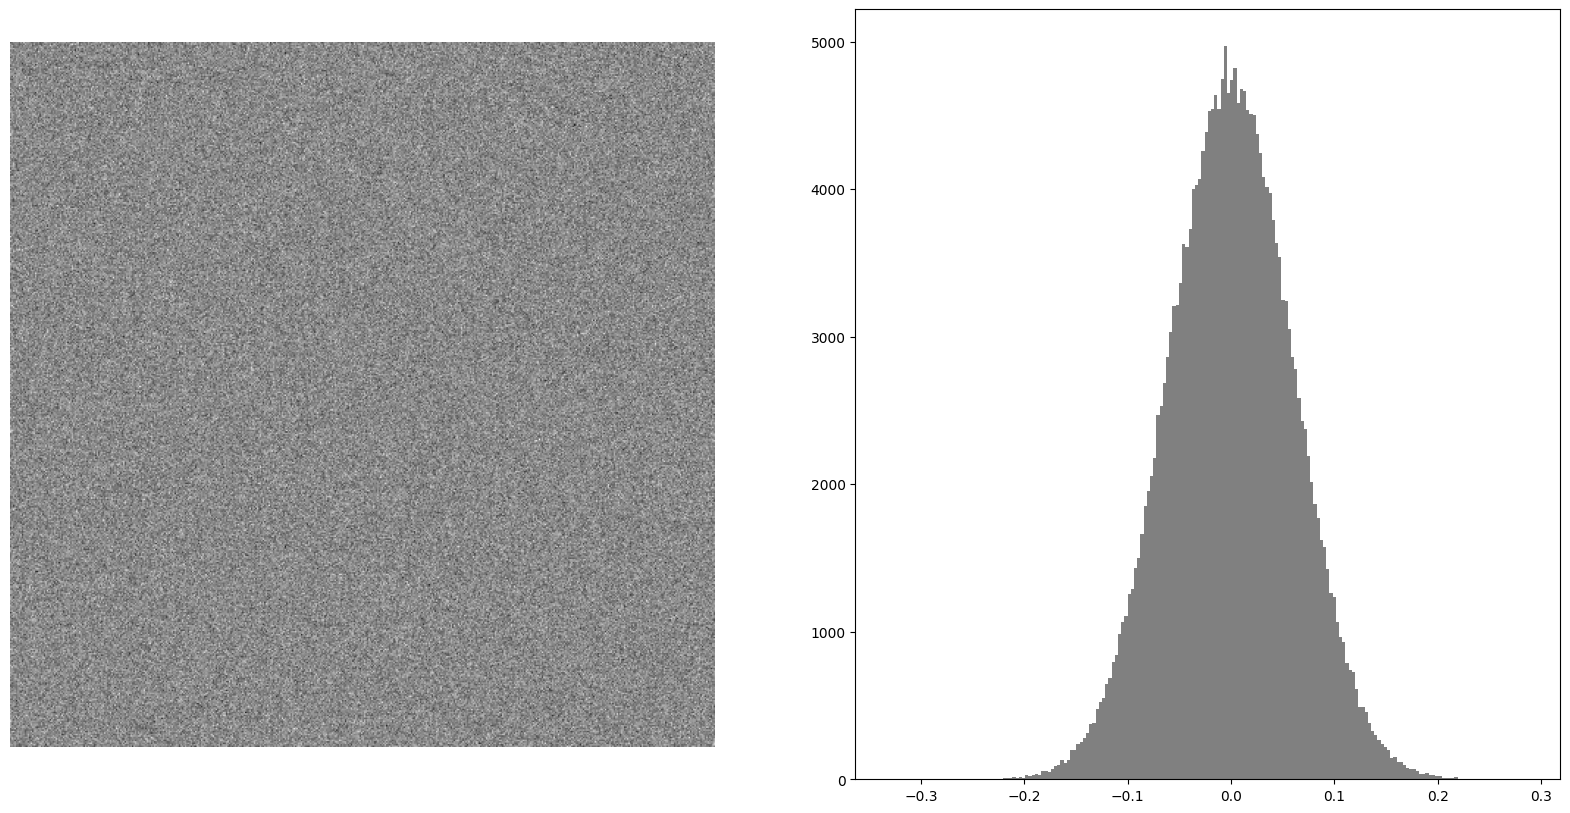

In [5]:
noise1 = np.random.normal(scale = 0.06 , size  = moon_gray.shape)
plot_hist(noise1 , 200)

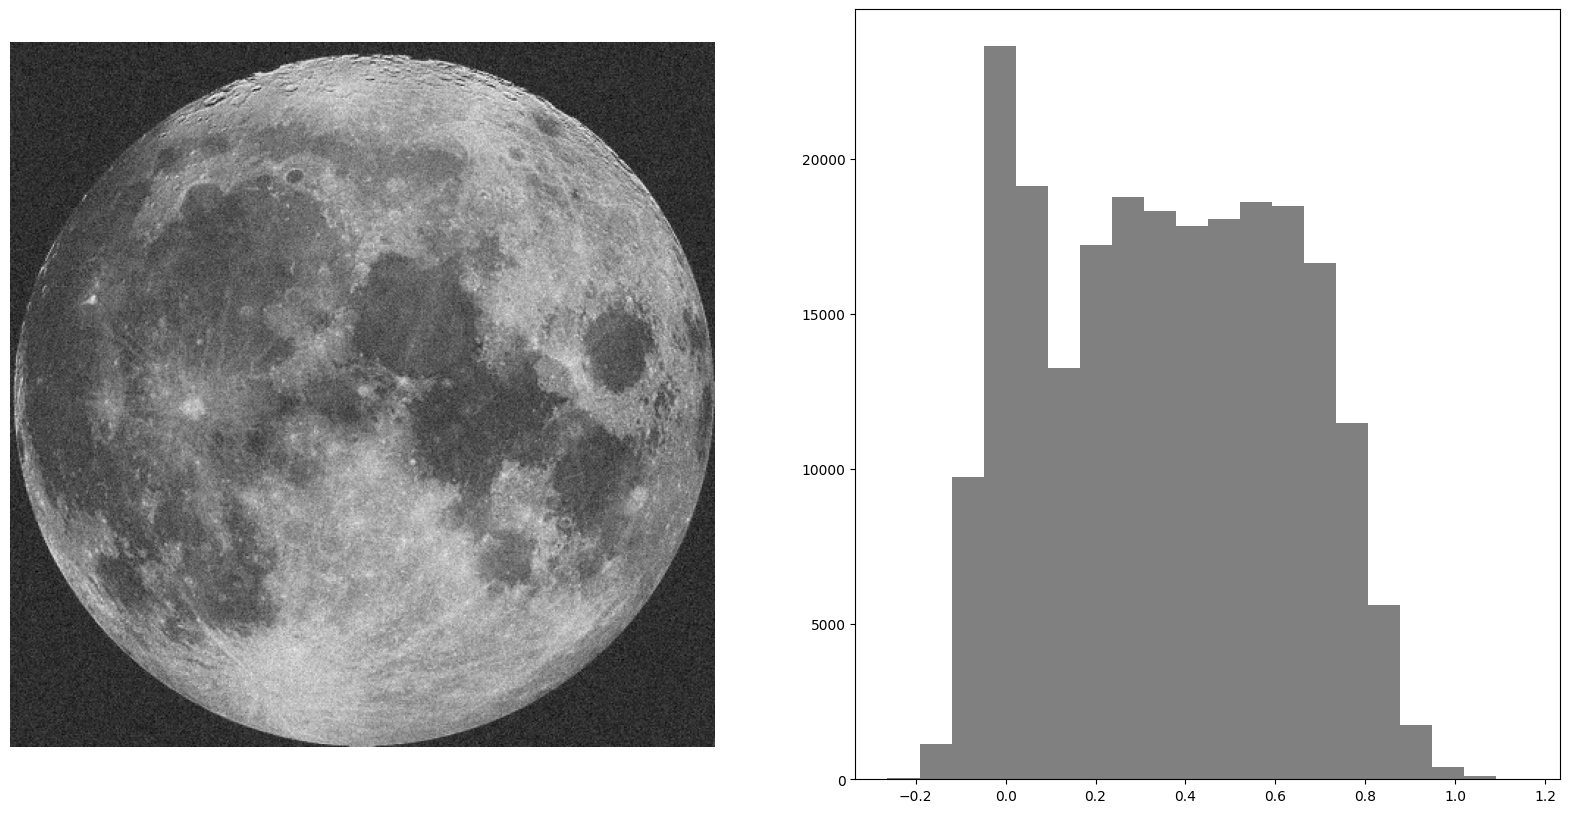

In [6]:
noisy_moon = noise1 + moon_gray
plot_hist(noisy_moon)

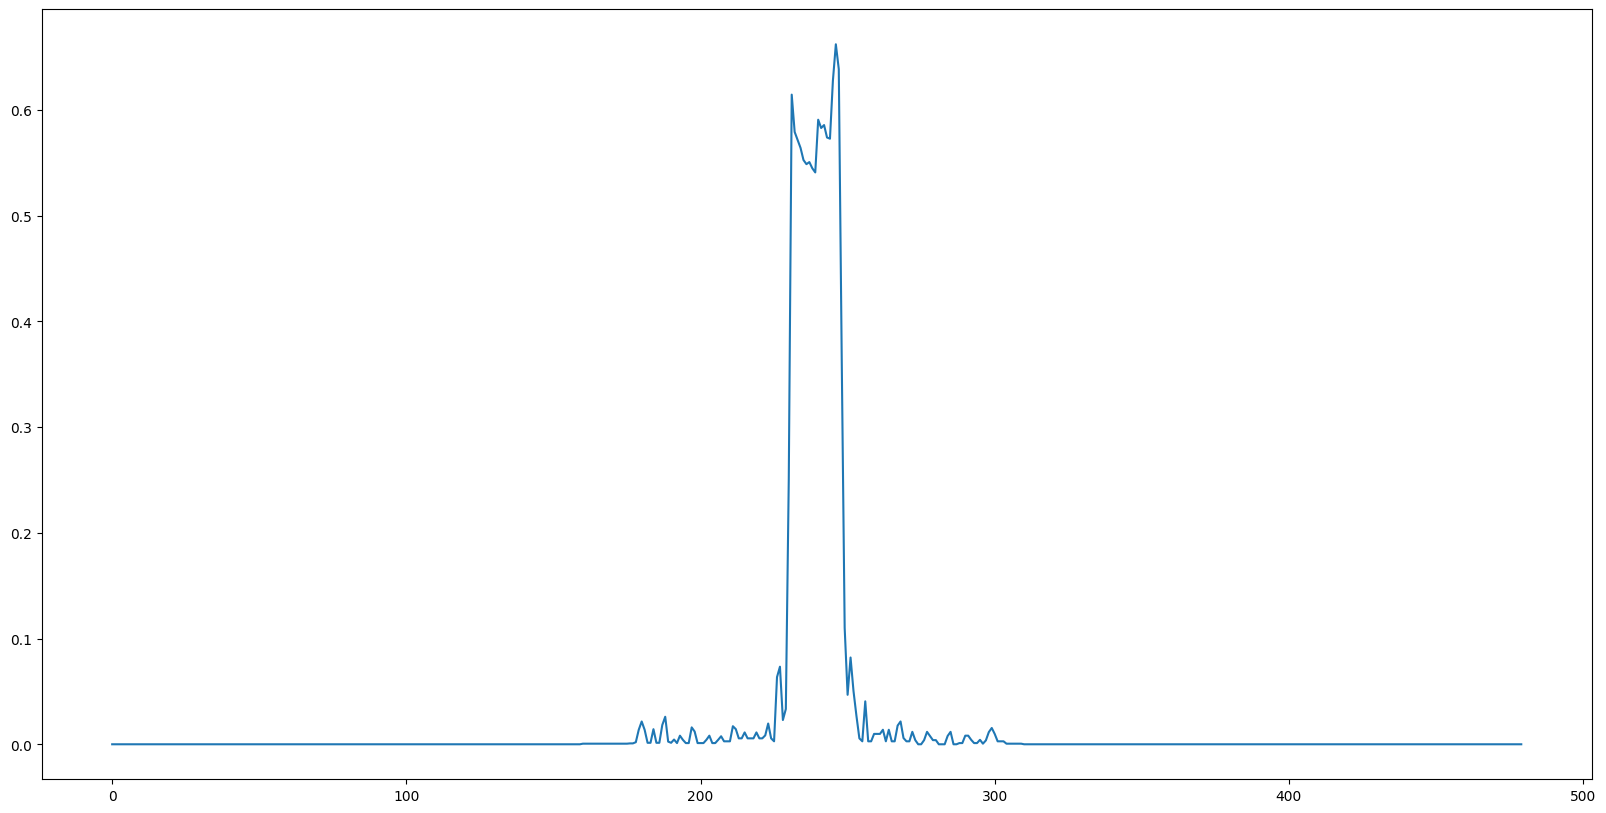

In [7]:
plot_line(moon_gray , 479)

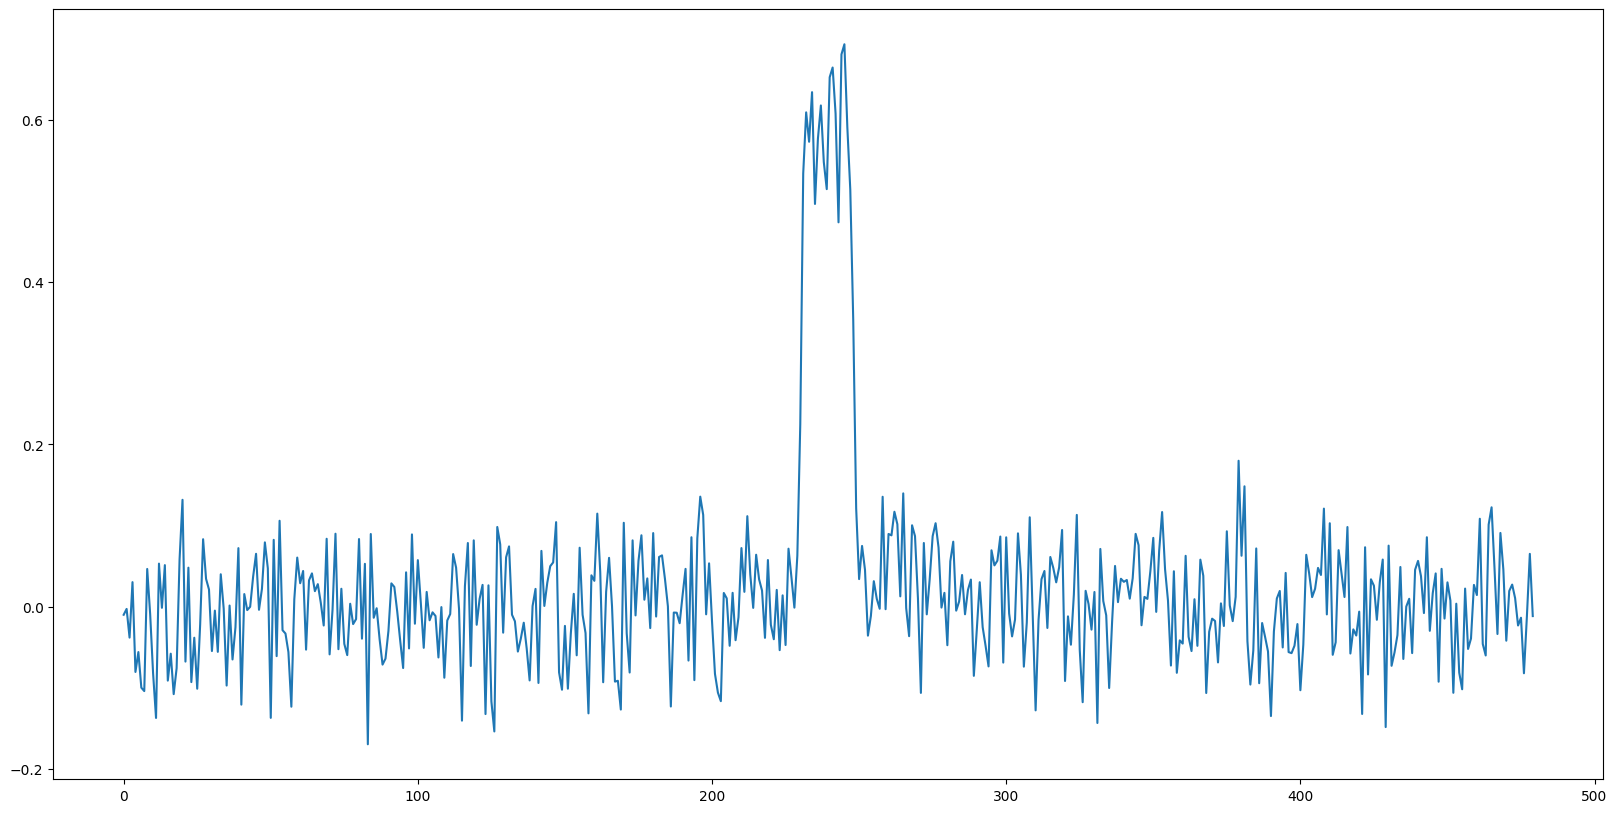

In [8]:
plot_line(noisy_moon , 479)

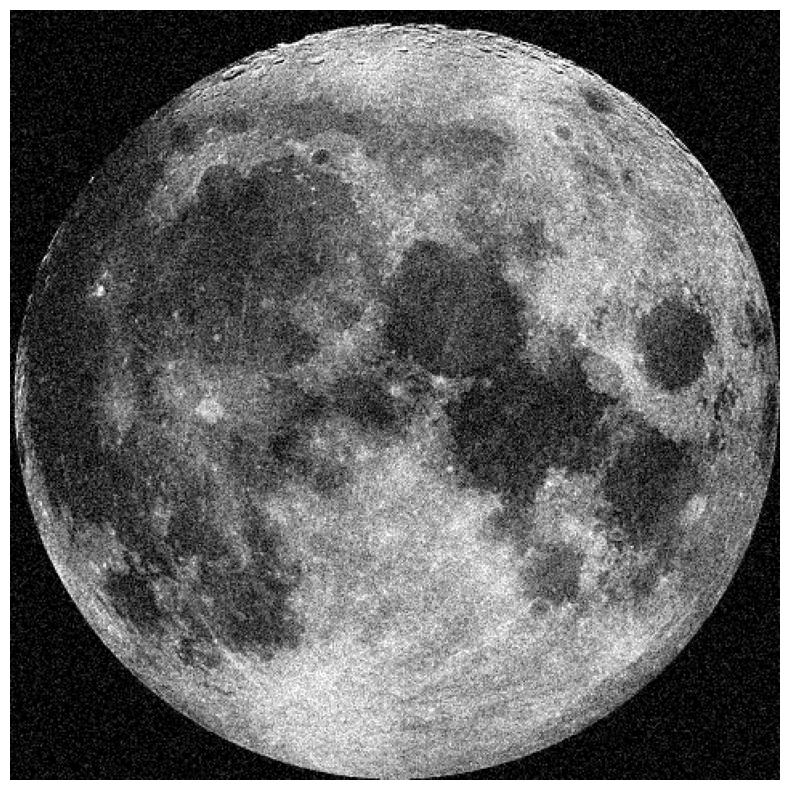

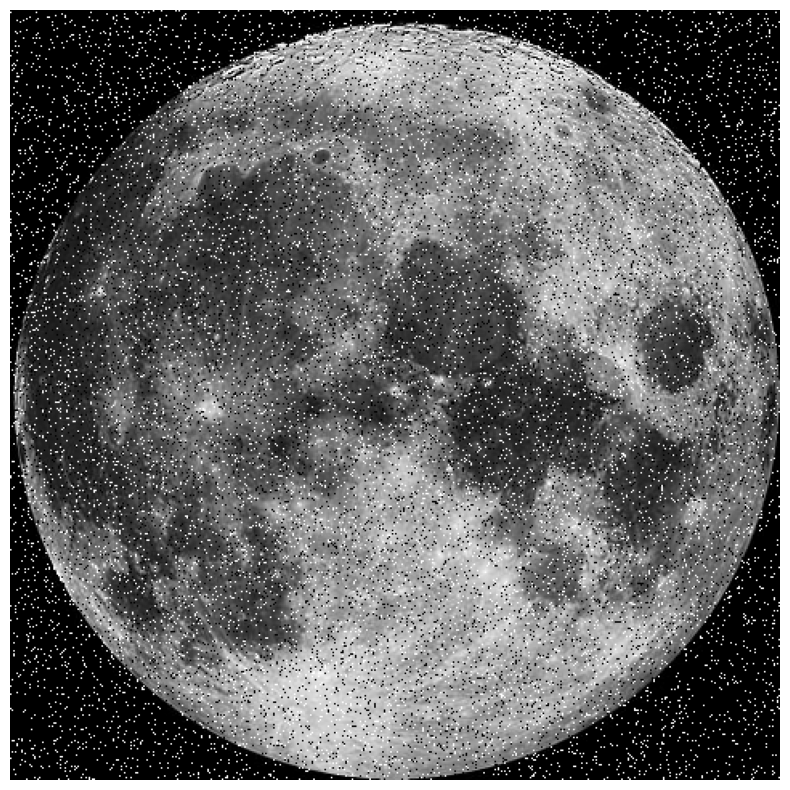

In [9]:
gaussian_moon2 = random_noise(moon_gray , 'gaussian' , var = 0.01)
sp_moon = random_noise(moon_gray , 's&p' , amount = 0.1)
imshow_gray(gaussian_moon2)
imshow_gray(sp_moon)

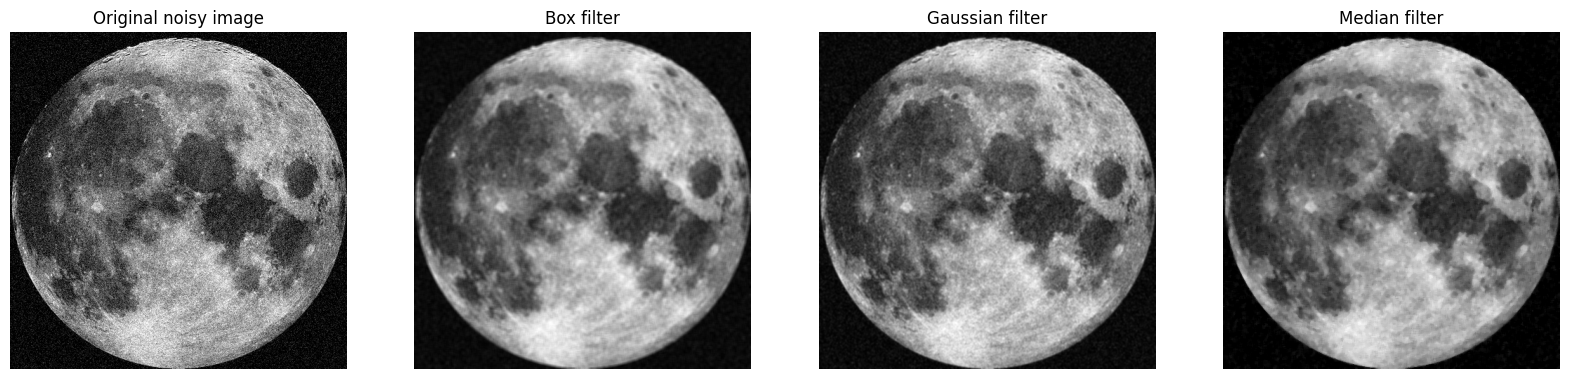

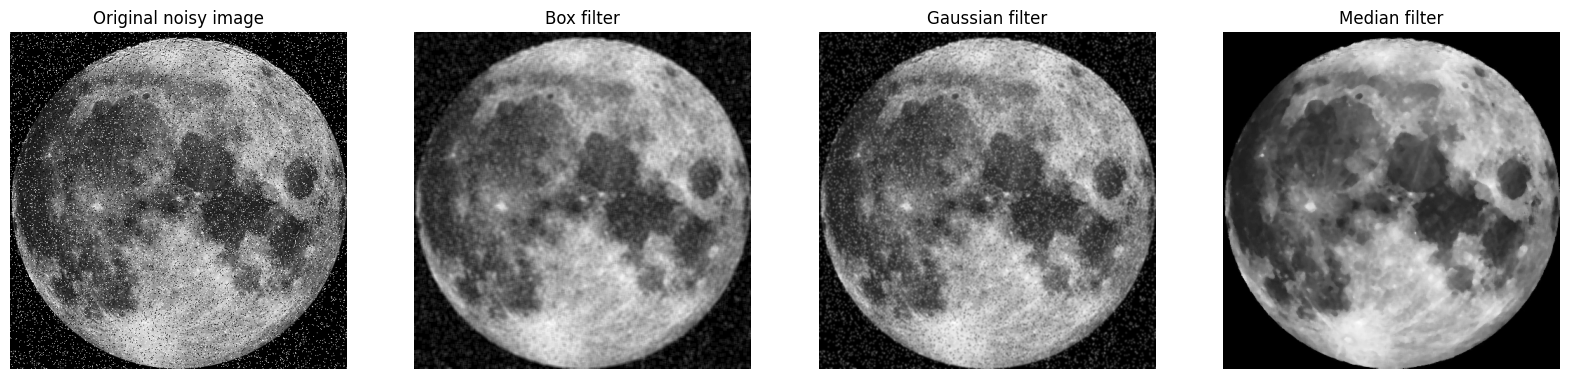

In [10]:
def create_noisy_plots(noisy_image, kernel=5):
    avg_filter = uniform_filter(noisy_image, kernel)
    gau_filter = gaussian_filter(noisy_image, 1)
    med_filter = median_filter(noisy_image, kernel)

    f, ax = plots(1, 4)
    ax[0].imshow(noisy_image, cmap=GREY), ax[0].axis('off'), ax[0].set_title('Original noisy image')
    ax[1].imshow(avg_filter, cmap=GREY), ax[1].axis('off'), ax[1].set_title('Box filter')
    ax[2].imshow(gau_filter, cmap=GREY), ax[2].axis('off'), ax[2].set_title('Gaussian filter')
    ax[3].imshow(med_filter, cmap=GREY), ax[3].axis('off'), ax[3].set_title('Median filter')
    
    plt.show()
    


create_noisy_plots(gaussian_moon2, kernel=5)
create_noisy_plots(sp_moon, kernel=5)

In [11]:
#Bastián Andrés Carrasco Espinoza A01761668
#Samantha Daniela Guanipa Ugas A01703936
#Cesar Alonso Álvarez Rojas A01761589
#Carlos Nicolás Ávila Amigo A01761673
#Edgar Alexander Carrizalez Lerín A01024901

def average_noise_filterG(img , N ):
    '''La funcion recibe un valor de entrada el cual tiene que ser una imagen sin error,
      esto nos sirve para que podamos agregarle el ruido dentro de la misma funcion para que 
      lo generemos para la demostracion dentro de la funcion'''
    
    normal = img #Generamos una copia para mostrarlo en la grafica 
    
    res = random_noise(img , 'gaussian' , var = 0.1) #Generamos la copia para tener una imagen del mismo tamaño que las muestras
    #Sin embargo le agregamos ruido para mostrar que va a ser modificada y no se esta imprimiendo al final
    
    gm = []
    
    f , ax = plots(1 , 3) #Plot 
    
    ax[0].imshow(normal, cmap=GREY), ax[0].axis('off'), ax[0].set_title('Base' ) #Agregamos la imagen original
    
    #random_noise(moon_gray , 's&p' , amount = 0.1)
    #random_noise(img , 'gaussian' , var = 0.1)
    gmNoise1 = random_noise(img , 'gaussian' , var = 0.1)
    
    #Probamos con s&p para mostrar que el promedio de
    
    ax[1].imshow(gmNoise1, cmap=GREY), ax[1].axis('off'), ax[1].set_title('Gaussian' ) #Muestra de Ruido
    
    for x in range (N): #Generamos N numero de muestras 
        gmNoise2 = random_noise(img , 'gaussian' , var = 0.1)
        gm.append(gmNoise2)
          
    for i in range (len(gm)): #Hacemos la sumatoria 
        res = res + gm[i]
        
    res = res/len(gm) #Dividimos para generar el promedio 
    
    ax[2].imshow(res, cmap=GREY), ax[2].axis('off'), ax[2].set_title('Resultado') #Lo agregamos a la grafica 
    plt.show()

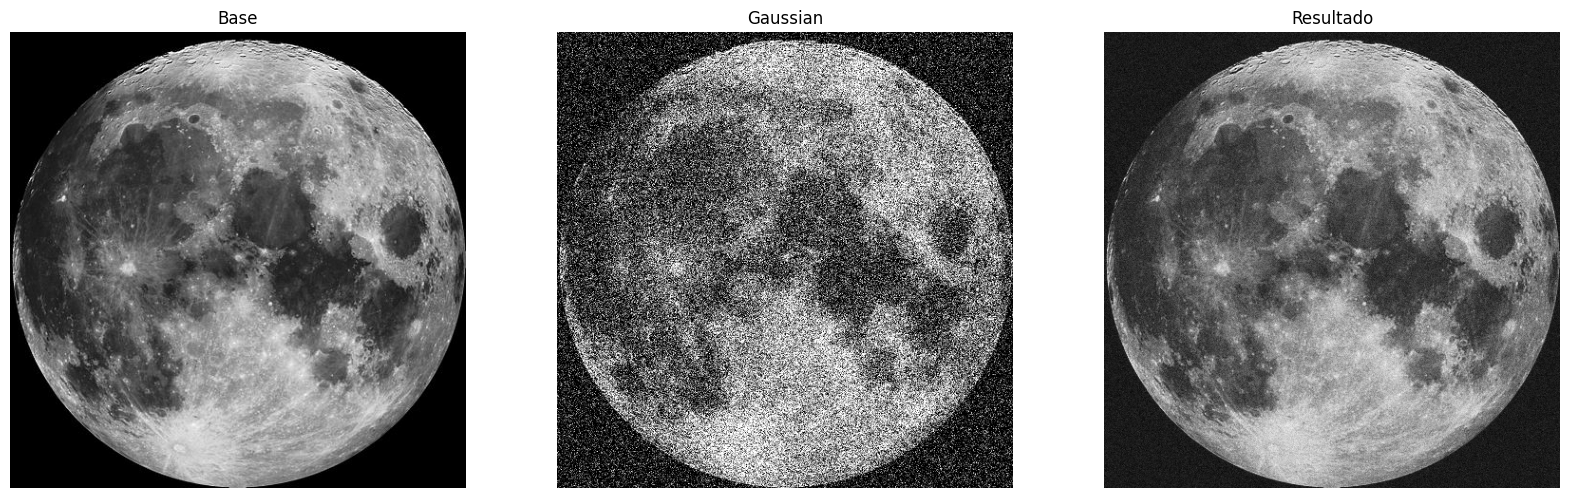

In [13]:
#sp_moon gaussian_moon2
average_noise_filterG(moon_gray , 50)